# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Toxic Comment Classification with CNN

Exploratory Data Analysis

In this step, the dataset provided by Kaggle will be analyzed. The analysis will include the type of the data, basic statistics, abnormalities, etc. Where possible, visualization of the features about the data will be provided.


File descriptions

1. train.csv - the training set, contains comments with their binary labels
2. test.csv - the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.
3. sample_submission.csv - a sample submission file in the correct format (will not be used for capstone project)
4. test_labels.csv - labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)

In [6]:
# import required labraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Read in train and test datasets
train = pd.read_csv('train.csv')
test_cm = pd.read_csv('test.csv')
test_lb = pd.read_csv('test_labels.csv')

# Merge test comments with test labels
test_all = pd.merge(test_cm, test_lb, on='id')
#test_all = test_all.reset_index(drop=True)

# use only a subset of test data since value of -1 indicates it was not used for scoring
test = test_all[test_all['toxic'] != -1]

# list label names
label_names = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [7]:
# Example data in train
train.loc[train[label_names].sum(axis=1) != 0].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [8]:
# Example data in test
test_all.loc[test_all[label_names].sum(axis=1) > 0].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
48,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,1,0,1,0,1,1
59,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0
76,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,1,0,0,0,0,0
81,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",1,0,1,0,1,0


In [9]:
# Data information in train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
# Data information in all test data
test_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153164 entries, 0 to 153163
Data columns (total 8 columns):
id               153164 non-null object
comment_text     153164 non-null object
toxic            153164 non-null int64
severe_toxic     153164 non-null int64
obscene          153164 non-null int64
threat           153164 non-null int64
insult           153164 non-null int64
identity_hate    153164 non-null int64
dtypes: int64(6), object(2)
memory usage: 10.5+ MB


In [11]:
# Data information in test data excluding labels with -1 value
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63978 entries, 5 to 153156
Data columns (total 8 columns):
id               63978 non-null object
comment_text     63978 non-null object
toxic            63978 non-null int64
severe_toxic     63978 non-null int64
obscene          63978 non-null int64
threat           63978 non-null int64
insult           63978 non-null int64
identity_hate    63978 non-null int64
dtypes: int64(6), object(2)
memory usage: 4.4+ MB


In [12]:
# Number of unique values in integer columns in train
train.select_dtypes(np.int64).nunique()

toxic            2
severe_toxic     2
obscene          2
threat           2
insult           2
identity_hate    2
dtype: int64

In [13]:
# Number of unique values in integer columns in test
test.select_dtypes(np.int64).nunique()

toxic            2
severe_toxic     2
obscene          2
threat           2
insult           2
identity_hate    2
dtype: int64

In summary, dataset train has 159571 comments. dataset test_all has 153164 comments. However, only 63978 comments in dataset test are used for scoring. Dataset train has 8 columns. These are id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate. Id column is just a unique identifier for each entry. comment_text will be classified. Each of the 6 categories is labeled either 0 or 1. dataset from test.csv has 2 columns. These are id and comment_text. The test_lb has 7 columns. These are id, toxic, severe_toxic, obscene, threat, insult, identity_hate. The test_labels was published after competition ended. So, we will use train dataset to train our model and use test dataset (excluding labels with -1 values) to test and score our trained model.

In [14]:
# Check for missing values in train
print(train.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [15]:
# Check for missing values in test
print(test.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


So, there are no missing values.

In [16]:
# Mean values for each label
train[label_names].mean(axis=0)

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

In [17]:
# Occurrences of each label relative to the number of samples
train_lb = train[label_names]
train_lb_counts = (train_lb.sum()/len(train_lb)).sort_values(ascending=False)
print(train_lb_counts)

toxic            0.095844
obscene          0.052948
insult           0.049364
severe_toxic     0.009996
identity_hate    0.008805
threat           0.002996
dtype: float64


Here we see about 9.6% comments in train are 'tpxic'; about 5% ar 'obscene' or 'insult'; about 1% are 'severe_toxic' or 'identity_hate'; about 0.3% is 'threat'.

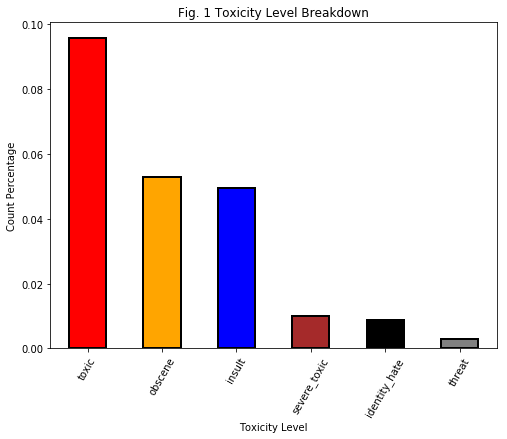

In [22]:
# Plot relative count for each toxicity category

from collections import OrderedDict
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'brown', 5: 'black', 6: 'grey'})
toxicity_mapping = OrderedDict({1: 'toxic', 4: 'severe_toxic', 2: 'obscene', 6: 'threat', 3: 'insult', 5: 'identity_hate'})
train_lb_counts.plot.bar(figsize = (8, 6), color = colors.values(), edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Toxicity Level'); 
plt.ylabel('Count Percentage'); 
plt.xticks([x - 1 for x in toxicity_mapping.keys()], list(toxicity_mapping.values()), rotation = 60)
plt.title('Fig. 1 Toxicity Level Breakdown');

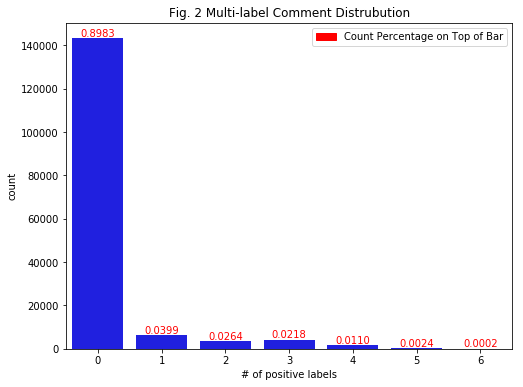

In [23]:
# Plot count for multi-label coments
import matplotlib.patches as mpatches
import seaborn as sns
#sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
x = train[label_names].sum(axis=1).value_counts()
ax = sns.barplot(x.index, x.values, color='blue')

plt.xlabel('# of positive labels')
plt.ylabel('count')
plt.title("Fig. 2 Multi-label Comment Distrubution")

patch = mpatches.Patch(color='red', label='Count Percentage on Top of Bar')
plt.legend(handles=[patch])

# Add count on the bar
rects = ax.patches
labels = x.values / len(train.index)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = format(label, '.4f')
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', color='red')

plt.show()

Here we see most comments do not have any positive label. These are clean comments. About 4% comments have 1 positive toxicity label and about 6% have 2 or more positive toxicity labels.

In [24]:
# Does severe_toxic always mean toxic?
train.loc[(train['severe_toxic'] == 1) & (train['toxic'] != 1), label_names]

,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [25]:
# What are category value looks like when severe_toxic is True?
train[train['severe_toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0
746,020316a0de9e0406,"""You know, I was thinking...\n\nNobody really ...",1,1,1,0,0,0
756,0207005a6576eafc,"Here's an idea \n\nGo fuck yourself, cumshitter.",1,1,1,0,1,0
761,0209cdf3131130ed,""" WILL MY MOTHERFUCKING SAFETY BE GUARANTEED?...",1,1,1,0,1,0
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1


Looks like this is a multi-label classification problem. Based on the value of mean in train data description, most of the categories are labeled 0. We can also see this from count percentage for each label. The count percentages for severe_toxic, identity_hate and threat are below 5%. So, roc_auc might not be a good metric in this case since we are more interested in capturing toxic comments and not so care about clean comments. However, we'll stick to roc_auc since it is a required scoring for this challenge. In practice, we want to consider classification imbalance and other metric such as precision-recall curve might be more appropreate. Also, the severe_toxic is a sub-category of toxic and we see example comments with multiple positive labels.

In [26]:
# import stopwords
from nltk.corpus import stopwords
#from nltk.tokenize import RegexpTokenizer

# function for filter out stopwords
def filter_stop_words(sentences, stop_words):
    filtered = []
    for sentence in sentences:
        words = sentence.split()
        words_filtered = [word for word in words if word not in stop_words]
        filtered.append(" ".join(words_filtered))
    return filtered

stop_words = set(stopwords.words("english"))

# Comments in train
train_cm = train['comment_text']
train_cm_filtered = filter_stop_words(train_cm, stop_words)

# Comments in test_all
test_all_cm = test_all['comment_text']
test_all_cm_filtered = filter_stop_words(test_all_cm, stop_words)

# Comments in test (excluding labels with -1 values)
test_cm = test['comment_text']
test_cm_filtered = filter_stop_words(test_cm, stop_words)


In [27]:
# before filter out stop words
train_cm[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [28]:
# convert to series
train_cm_filtered = pd.Series(train_cm_filtered)

In [30]:
# after filter out stop words
train_cm_filtered[0]

"Explanation Why edits made username Hardcore Metallica Fan reverted? They vandalisms, closure GAs I voted New York Dolls FAC. And please remove template talk page since I'm retired now.89.205.38.27"

In [32]:
# Make a copy of the train datasets
c_train = train.copy(deep=True)

In [33]:
# Add a 'clean' column to the dataframe
c_train['clean'] = c_train[label_names].sum(axis=1) == 0

In [34]:
# Number of sentence in a comment
import re
sentence_count = train_cm.apply(lambda x: len(re.findall("\n",str(x)))+1)

In [69]:
# Add 'stopwords_count' column in a comment to dataframe
c_train['stopwords_count'] = c_train['comment_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [70]:
c_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,stopwords_count,ip,ip_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,18,[89.205.38.27],1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,2,[],0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,20,[],0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,56,[],0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,5,[],0


/anaconda2/envs/toxic3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


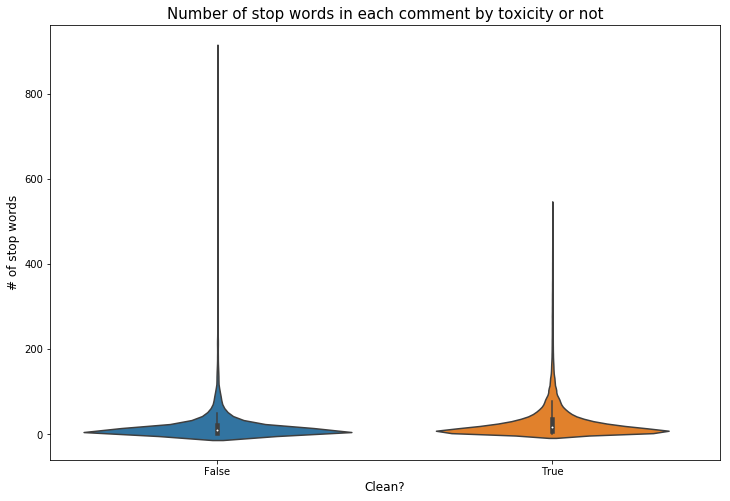

In [52]:
# Plot number of stopwords in each comment by toxicity or not
plt.figure(figsize=(12,8))

sns.violinplot(y='stopwords_count',x='clean', data=c_train, split = True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of stop words', fontsize=12)
plt.title("Number of stop words in each comment by toxicity or not", fontsize=15)

plt.show()

In [71]:
# Add 'ip' column in a comment to dataframe
c_train['ip'] = c_train['comment_text'].apply(lambda x: re.findall("(?:[0-9]{1,3}\.){3}[0-9]{1,3}",str(x)))


In [72]:
# Sample IPs
c_train['ip'][c_train['ip'].str.len() != 0].head(5)

0        [89.205.38.27]
8      [93.161.107.169]
37     [70.100.229.154]
44       [76.122.79.82]
65    [201.215.187.159]
Name: ip, dtype: object

In [56]:
# Add 'ip_count' column in a comment to dataframe
c_train['ip_count'] = c_train['ip'].apply(lambda x: len(x))

In [62]:
# Distribution of ip numbers in a clean comment
c_train[c_train['clean']]['ip_count'].value_counts()

0     134718
1       8063
2        394
3         86
4         40
5         16
6         15
8          4
7          3
13         2
9          2
17         1
16         1
12         1
Name: ip_count, dtype: int64

In [63]:
# Distribution of ip numbers in a non-clean comment
c_train[c_train['clean'] == False]['ip_count'].value_counts()

0     14772
1      1383
2        47
3         7
4         5
6         3
5         3
17        2
42        1
9         1
40        1
Name: ip_count, dtype: int64

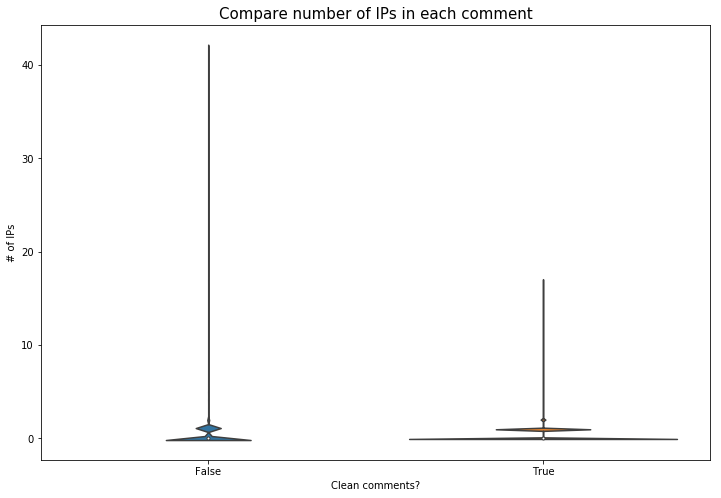

In [66]:
# Plot and compare number of IPs in clean and non-clean comments
plt.figure(figsize=(12,8))

sns.violinplot(y='ip_count',x='clean', data=c_train, split = True)
plt.xlabel('Clean comments?', fontsize=10)
plt.ylabel('# of IPs', fontsize=10)
plt.title("Compare number of IPs in each comment", fontsize=15)

plt.show()

There is no significant indication that a toxic comment contain more IPs. So, we can remove IPs from comments

In [67]:
# Extract link from comments
link = c_train['comment_text'].apply(lambda x: re.findall("http://.*com",str(x)))

In [68]:
# Sample links in documents
link[link.str.len() != 0].head(5)

33                                     [http://digg.com]
73     [http://www.constitution.ie/reports/Constituti...
101    [http://www.iranchamber.com, http://www.superb...
117                            [http://books.google.com]
188          [http://upload.wikimedia.org/wikipedia/com]
Name: comment_text, dtype: object

In [73]:
# Add 'link_count' column in a comment to dataframe
c_train['link_count'] = link.apply(lambda x: len(x))

In [74]:
# Distribution of link counts
c_train['link_count'].value_counts()

0     157315
1       1873
2        219
3         68
4         31
5         18
6         15
8          8
11         7
7          5
12         3
10         3
9          3
16         2
13         1
Name: link_count, dtype: int64

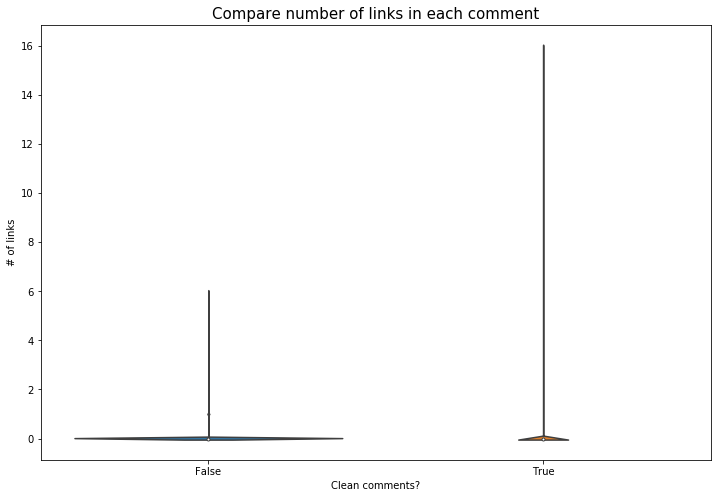

In [79]:
# Plot and compare number of links in each comment
plt.figure(figsize=(12,8))

sns.violinplot(y='link_count',x='clean', data=c_train, split = True)
plt.xlabel('Clean comments?', fontsize=10)
plt.ylabel('# of links', fontsize=10)
plt.title("Compare number of links in each comment", fontsize=15)

plt.show()

In [81]:
# Extract username from comments
username = train_cm.apply(lambda x: re.findall("\[\[.*\]",str(x)))

In [84]:
# Add 'username_count' column in a comment to dataframe
c_train['username_count'] = username.apply(lambda x: len(x))

In [85]:
# Distribution of username counts
c_train['username_count'].value_counts()

0     159139
1        395
2         25
3          3
12         2
4          2
43         1
9          1
8          1
7          1
6          1
Name: username_count, dtype: int64

In [86]:
# Sample of usernames
username[username.str.len() != 0].head(5)

140     [[[Reformist Party (Serbia)|Reformist Party]]
324                           [[[Media:Example.ogg]]]
706               [[[User talk:Spinningspark|Spark]]]
2247                 [[[User_Talk:King Lopez|Lopez]]]
2594                     [[[:File:BSVRR EMD FP9.jpg]]
Name: comment_text, dtype: object

In [87]:
# Example comment containing a username
c_train['comment_text'][140]

"06, 29 December 2007 (UTC)\nYep. LOL, the [[Reformist Party (Serbia)|Reformist Party] is having another go (the 20th very last on the parliamentary election, winning less votes than notable to actually be mentioned). ) \nBy the way, here's something very little people have figured out - the new Constitution of Serbia has been brought to enable Kosovo' secession. The 1990 Constitution barred that as a possibility, and after the Kumanovo Military-Technical Agreement was signed between NATO and FRY the SRS broke its coalition with SPS and the government collapsed, causing new elections - because that was unconstitutional, as an act of highest treason, enough to be tried from maximum sentence (which the Radicals demanded from then to his death, to have a trial in Serbia, and to be tried for treason among other reasons). This constitution releases the authorities from that weight, and they won't have to go to prison if they recognize any form of further loss of sovereignty in Kosovo. ;)   

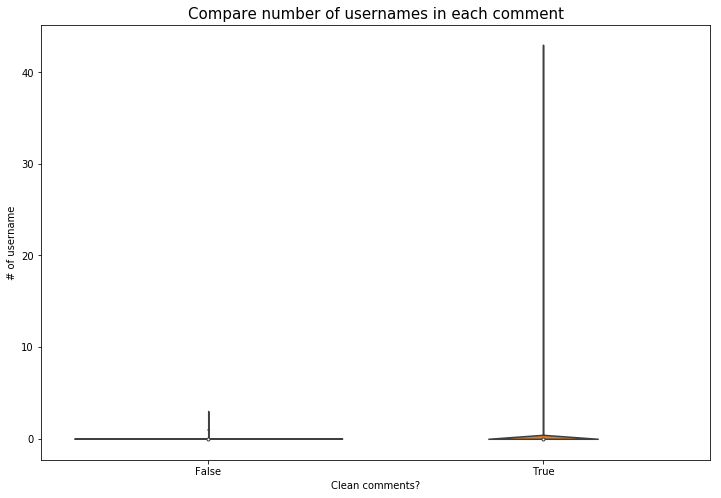

In [88]:
# Plot and compare number of usernames in each comment
plt.figure(figsize=(12,8))

sns.violinplot(y='username_count',x='clean', data=c_train, split = True)
plt.xlabel('Clean comments?', fontsize=10)
plt.ylabel('# of username', fontsize=10)
plt.title("Compare number of usernames in each comment", fontsize=15)

plt.show()

We use tf-idf to generate features from comments
Let's look at top features in a comment as an example

In [89]:
all_cm = pd.concat([train_cm, test_all_cm])

In [90]:
# We want to generate features using sklearn tfidfVectorizer from all the comments
# We limit maximum features to 100000 due to memory constraint
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100000)
word_vectorizer.fit(train_cm)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [91]:
# Get the feature names
features = np.array(word_vectorizer.get_feature_names())

In [94]:
# Generate both train set and test set
train_word_features = word_vectorizer.transform(train_cm)
test_all_word_features = word_vectorizer.transform(test_all_cm)
test_word_features = word_vectorizer.transform(test_cm)

In [95]:
train_word_features

<159571x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 3980541 stored elements in Compressed Sparse Row format>

In [96]:
test_all_word_features

<153164x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 3290455 stored elements in Compressed Sparse Row format>

In [97]:
test_word_features

<63978x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1446206 stored elements in Compressed Sparse Row format>

In [98]:
# https://buhrmann.github.io/tfidf-analysis.html
# take a single row of the tf-idf matrix (corresponding to a particular document), 
# and return the n highest scoring words (or more generally tokens or features)
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

# https://buhrmann.github.io/tfidf-analysis.html
# convert a single row (row_id) from a sparse matrix (Xtr) into dense format
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

Sample top 10 features on index 1 in train_cm

In [99]:
train_cm[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [100]:
x = top_feats_in_doc(train_word_features, features, 1, 10)

In [101]:
print(x)

      feature     tfidf
0         aww  0.391810
1        2016  0.352725
2      colour  0.316021
3   seemingly  0.312463
4     matches  0.287123
5          51  0.286867
6       stuck  0.284879
7  background  0.243002
8     january  0.240711
9          21  0.230197


In [105]:
# What is the vacabulary for the comments

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

# for train data
T = Tokenizer()
T.fit_on_texts(list(train_cm))
vocab = len(T.word_index) + 1
print('Vocabulary for train comments is {}'.format(vocab))

# for all data
T = Tokenizer()
T.fit_on_texts(list(train_cm) + list(test_all_cm))
vocab = len(T.word_index) + 1
print('Vocabulary for all comments is {}'.format(vocab))

# after filter out stopwords
T = Tokenizer()
T.fit_on_texts(list(train_cm_filtered) + list(test_all_cm_filtered))
vocab = len(T.word_index) + 1
print('Vocabulary for all comments after filtering out stopwords is {}'.format(vocab))

# for all data exclude labels with -1 values
T = Tokenizer()
T.fit_on_texts(list(train_cm) + list(test_cm))
vocab = len(T.word_index) + 1
print('Vocabulary for all comments excluding non-scoring ones is {}'.format(vocab))

# Excluding labels with -1 values and filtered out stopwords
T = Tokenizer()
T.fit_on_texts(list(train_cm_filtered) + list(test_cm_filtered))
vocab = len(T.word_index) + 1
print('Vocabulary for all comments after filtering out stopwords and excluding non-scoring ones is {}'.format(vocab))

Vocabulary for train comments is 210338
Vocabulary for all comments is 394788
Vocabulary for all comments after filtering out stopwords is 393637
Vocabulary for all comments excluding non-scoring ones is 300258
Vocabulary for all comments after filtering out stopwords and excluding non-scoring ones is 299317


In [106]:
# Check number of comments in train and test dataset
t_train = T.texts_to_sequences(train_cm_filtered)
t_test = T.texts_to_sequences(test_cm_filtered)
print(len(t_train))
print(len(t_test))

159571
63978


In [107]:
# A sample comment
train_cm[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [108]:
# Words after removing punctuations and stopwords
word_t = text_to_word_sequence(train_cm_filtered[0])
print(len(word_t))
print(word_t)

33
['explanation', 'why', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted', 'they', 'vandalisms', 'closure', 'gas', 'i', 'voted', 'new', 'york', 'dolls', 'fac', 'and', 'please', 'remove', 'template', 'talk', 'page', 'since', "i'm", 'retired', 'now', '89', '205', '38', '27']


In [111]:
# Word sequenced
print(len(t_train[0]))
t_train[0]

33


[638,
 147,
 68,
 65,
 629,
 4582,
 11936,
 1149,
 280,
 224,
 13013,
 6653,
 2628,
 1,
 2869,
 52,
 1190,
 16459,
 2510,
 22,
 10,
 182,
 292,
 8,
 5,
 76,
 19,
 3594,
 110,
 3643,
 5445,
 2429,
 1051]

In [112]:
# Let's find max number of words in a sentence
n_words_in_a_sentence = [len(x) for x in t_train + t_test]
print(max(n_words_in_a_sentence))

2142


<function matplotlib.pyplot.show(*args, **kw)>

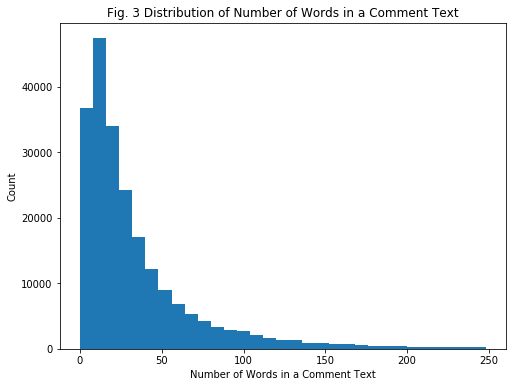

In [113]:
# Plot number of words in a sentence histgram
plt.figure(figsize = (8, 6))
plt.hist(n_words_in_a_sentence,bins = np.arange(0,250,8))
# Formatting
plt.xlabel('Number of Words in a Comment Text'); plt.ylabel('Count'); 
plt.title('Fig. 3 Distribution of Number of Words in a Comment Text');

plt.show

In [117]:
# Estimate maximum word length to use in word embbedding to cover 97% of the sentences
n_words_in_a_sentence.sort()
percent_sentences = 97.3/100.0
a = n_words_in_a_sentence[:round(len(n_words_in_a_sentence)*percent_sentences)]
print(a[-1])

200


So, with maximum number of words in a sentence set at 200, we cover over 97 percent of the comments without cut off